In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [2]:
import numpy as np

from sklearn.ensemble import IsolationForest as Skforest
from coniferest.isoforest import Isoforest
from coniferest.datasets import MalanchevDataset
import matplotlib.pyplot as plt

In [3]:
dataset = MalanchevDataset(inliers=2**14, outliers=2**6)

def plot_scores(scores):
    outliers = np.argsort(scores)[:2**6]

    plt.figure()
    plt.scatter(*dataset.data.T)
    plt.scatter(*dataset.data[outliers].T, color='r')

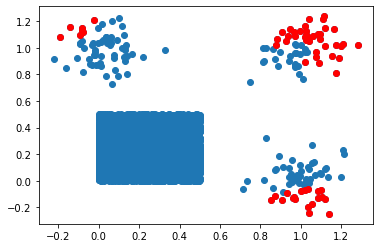

In [4]:
isoforest = Isoforest(n_subsamples=1024)
isoforest.fit(dataset.data)
scores = isoforest.score_samples(dataset.data)
plot_scores(scores)

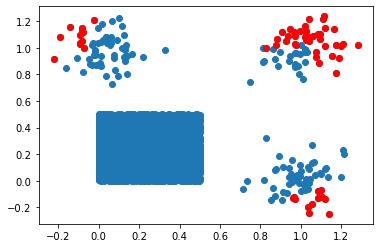

In [5]:
skforest = Skforest(max_samples=1024)
skforest.fit(dataset.data)
skscores = skforest.score_samples(dataset.data)
plot_scores(skscores)